# Demographic and Hesitancy Analysis

## Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [3]:
warnings.filterwarnings("ignore") # ignore all warnings like a madman
pd.options.display.float_format = '{:.3f}'.format

## Analysis

In [4]:
df = pd.read_csv(r'data\demo_hesitancy_by_zip.csv')

# Create a 65+ segment
seniors = ['total_65_to_69', 'total_70_to_74', 'total_75_to_79', 'total_80_to_84', 'total_85_and_over']
sum_cols = df['total_65_to_69'] + df['total_70_to_74'] + df['total_75_to_79'] + \
    df['total_80_to_84'] + df['total_85_and_over']
df['total_65_and_over'] = sum_cols
df['pct_65_and_over'] = df.total_65_and_over/df.total_pop

# Create est_hesitant by population segment
df['est_total_hesitant'] = df.total_pop*df.final_zip_pred
df['est_black_hesitant'] = df.black_pop*df.final_zip_pred
df['est_65_over_hesitant'] = df.total_65_and_over*df.final_zip_pred

df.total_pop = df.total_pop.astype(np.int64)
df.black_pop = df.black_pop.astype(np.int64)
df.total_65_and_over = df.total_65_and_over.astype(np.int64)

df = df[['zip_code', 'state_name', 'county_name', 'final_zip_pred', 'total_pop', 'est_total_hesitant', 'black_pop',
         'percent_black', 'est_black_hesitant', 'total_65_and_over', 'pct_65_and_over', 'est_65_over_hesitant']]
df.dtypes # shows the data types of each of the columns

zip_code                  int64
state_name               object
county_name              object
final_zip_pred          float64
total_pop                 int64
est_total_hesitant      float64
black_pop                 int64
percent_black           float64
est_black_hesitant      float64
total_65_and_over         int64
pct_65_and_over         float64
est_65_over_hesitant    float64
dtype: object

In [5]:
#df.to_csv(r'data\demo_hesitancy_by_zip_condensed.csv', index=False)
df.head()

,zip_code,state_name,county_name,final_zip_pred,total_pop,est_total_hesitant,black_pop,percent_black,est_black_hesitant,total_65_and_over,pct_65_and_over,est_65_over_hesitant
0,10001,New York,New York County,0.044,23947,1052.203,2489,0.104,109.364,2951,0.123,129.663
1,10002,New York,New York County,0.062,77925,4856.625,4762,0.061,296.789,15737,0.202,980.798
2,10003,New York,New York County,0.024,55035,1343.074,2058,0.037,50.223,6379,0.116,155.673
3,10004,New York,New York County,0.037,2990,110.150,5,0.002,0.184,198,0.066,7.294
4,10005,New York,New York County,0.037,8680,320.642,266,0.031,9.826,179,0.021,6.612


In [6]:
# Put the descriptive statistics into a DataFrame
stat = pd.DataFrame({'total_pop':df.total_pop.describe(), 'black_pop':df.black_pop.describe(),
                    'total_65_and_over':df.total_65_and_over.describe(), 'vax_hesitancy_pct':df.final_zip_pred.describe()})

# Add in the total populations (sums over the zip codes)
pop_sums = pd.DataFrame([[df.total_pop.sum(), df.black_pop.sum()]], index=['pop_totals'],
                        columns=['total_pop', 'black_pop'])
pop_sums['total_65_and_over'] = df.total_65_and_over.sum()
stat = stat.append(pop_sums)
stat = stat.drop(index='count')
stat

,total_pop,black_pop,total_65_and_over,vax_hesitancy_pct
mean,13993.460,1778.989,2060.570,0.078
std,15943.625,4525.536,2280.396,0.044
min,5.000,1.000,0.000,0.000
25%,2232.000,27.000,378.000,0.047
50%,7285.000,226.000,1167.000,0.071
75%,21427.000,1360.000,3124.250,0.101
max,119204.000,85098.000,43585.000,0.884
pop_totals,310263003.000,39443742.000,45686952.000,NaN


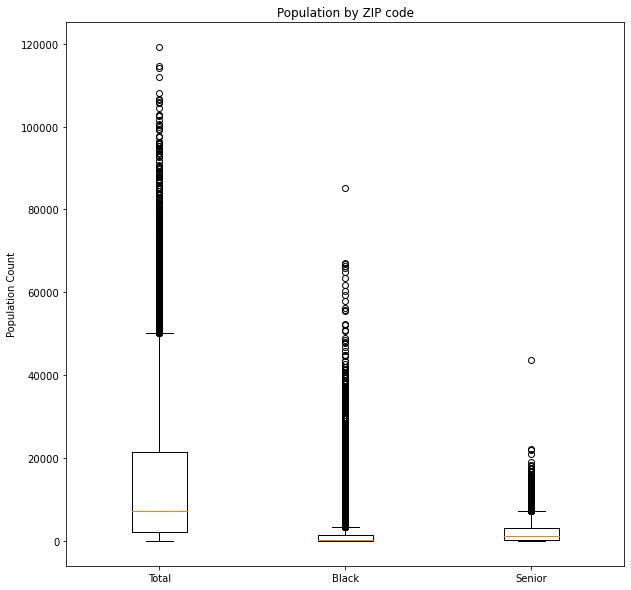

In [7]:
data = [df.total_pop, df.black_pop, df.total_65_and_over]
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title='Population by ZIP code',
    ylabel='Population Count'
)
ax.set_xticklabels(['Total', 'Black', 'Senior'])
ax.boxplot(data)
plt.show()

In [8]:
percentages = np.linspace(0, 0.5, num=21)
fmt_pct = [round(n*100,3) for n in percentages]
zip_dict = {'pct_hesitancy': fmt_pct,
           'ct_zips_greater_than': [],
           'pct_zips_greater_than': [],
           'black_pop': [],
           'pct_black_pop': [],
           'pop_65_and_over': [],
           'pct_65_and_over': []}

for p in percentages:
    ct = df[df.final_zip_pred > p].count()['zip_code']
    pct = round(ct/len(df)*100, 3)
    blk_pop = df[df.final_zip_pred > p].sum()['black_pop']
    blk_pct_pop = round(blk_pop/df['black_pop'].sum()*100,3)
    sen_pop = df[df.final_zip_pred > p].sum()['total_65_and_over']
    sen_pct_pop = round(sen_pop/df['total_65_and_over'].sum()*100,3)
    zip_dict['ct_zips_greater_than'].append(ct)
    zip_dict['pct_zips_greater_than'].append(pct)
    zip_dict['black_pop'].append(blk_pop)
    zip_dict['pct_black_pop'].append(blk_pct_pop)
    zip_dict['pop_65_and_over'].append(sen_pop)
    zip_dict['pct_65_and_over'].append(sen_pct_pop)

    
pd.DataFrame(zip_dict)

,pct_hesitancy,ct_zips_greater_than,pct_zips_greater_than,black_pop,pct_black_pop,pop_65_and_over,pct_65_and_over
0,0.000,22172,100.000,39443742,100.000,45686952,100.000
1,2.500,20554,92.703,38620193,97.912,43102258,94.343
2,5.000,15868,71.568,33210018,84.196,31538197,69.031
3,7.500,10230,46.139,24177587,61.296,18915128,41.402
4,10.000,5647,25.469,13386392,33.938,9207705,20.154
5,12.500,2767,12.480,6020068,15.262,3953673,8.654
6,15.000,1311,5.913,2524054,6.399,1620012,3.546
7,17.500,621,2.801,1163218,2.949,735079,1.609
8,20.000,306,1.380,529305,1.342,354810,0.777
9,22.500,165,0.744,223717,0.567,190050,0.416


In [18]:
va_df = df[df['state_name'] == 'Virginia']
brunswick = va_df[va_df['county_name'] == 'Brunswick County']
brunswick

,zip_code,state_name,county_name,final_zip_pred,total_pop,est_total_hesitant,black_pop,percent_black,est_black_hesitant,total_65_and_over,pct_65_and_over,est_65_over_hesitant
3677,23821,Virginia,Brunswick County,0.081,2040,165.119,1231,0.603,99.638,382,0.187,30.919
3678,23824,Virginia,Brunswick County,0.124,6587,816.253,2860,0.434,354.408,1320,0.200,163.573
3694,23843,Virginia,Brunswick County,0.063,580,36.616,197,0.340,12.437,162,0.279,10.227
3696,23845,Virginia,Brunswick County,0.059,370,21.880,76,0.205,4.494,145,0.392,8.575
3698,23847,Virginia,Brunswick County,0.082,15145,1247.555,9060,0.598,746.309,2430,0.160,200.169
3701,23856,Virginia,Brunswick County,0.117,726,85.228,484,0.667,56.819,227,0.313,26.648
3705,23868,Virginia,Brunswick County,0.049,7470,363.377,4554,0.610,221.529,1014,0.136,49.326
3709,23876,Virginia,Brunswick County,0.046,321,14.753,130,0.405,5.975,91,0.283,4.182
3717,23887,Virginia,Brunswick County,0.034,304,10.337,123,0.405,4.182,48,0.158,1.632
3719,23889,Virginia,Brunswick County,0.119,671,79.751,370,0.551,43.976,222,0.331,26.386


In [19]:
brunswick['black_pop'].sum()

22658

In [20]:
brunswick['est_black_hesitant'].sum()

1732.903747118

In [26]:
df.groupby(['state_name'])['black_pop'].sum().sort_values()

state_name
Montana                    4351
Wyoming                    5506
Vermont                    7534
Idaho                     10661
South Dakota              13801
Maine                     16065
New Hampshire             16167
North Dakota              17036
Alaska                    22508
Hawaii                    23977
Utah                      31731
New Mexico                37212
Rhode Island              56099
West Virginia             64395
Oregon                    73361
Nebraska                  87669
Iowa                     104262
Kansas                   163490
Delaware                 201411
Colorado                 209885
Nevada                   241959
Washington               250876
Arizona                  276148
Oklahoma                 278887
District of Columbia     315159
Minnesota                321587
Connecticut              350820
Kentucky                 351016
Wisconsin                359094
Massachusetts            455444
Arkansas                 4591